# Курсовой проект

## Описание проекта
**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

## Обзор данных<a class="anchor" id="course_project_review"></a>
**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [303]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Пути к директориям и файлам**

In [304]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'
PREP_DATASET_PATH = './course_project_prep.csv'

In [305]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [306]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()
TEST_BASE_FEATURE_NAMES = df_test.columns.tolist()
NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

In [307]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


In [308]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### Проверка значений базовых признаков

In [309]:
df = df_train
FEATURE_NAMES = BASE_FEATURE_NAMES
dataset_size = df.index.size
features_to_int = []
features_with_nans = []
for feature in FEATURE_NAMES:
    non_nan_count = df[feature].count()
    unique_values = df[feature].unique()
    if len(unique_values) > 20:
        unique_values_str = str(unique_values[:5]) + ' ... ' + str(unique_values[len(unique_values) - 5:])
    else:
        unique_values_str = str(unique_values)
    print(f"\033[1m{feature}\033[0m")
    print(f"\t\033[1mUnique values:\033[0m\n\t{unique_values_str}")
    print(f"\t\033[1mFeature not NaN size:\033[0m {non_nan_count}")
    print(f"\t\033[1mType of values:\033[0m {df_train.dtypes[feature]}")
    if non_nan_count == dataset_size:
        print(f"\033[95mПропусков нет\033[0m")
    elif non_nan_count / dataset_size > 0.9:
        print(f"\033[95mНемного пропусков\033[0m")
    else:
        print(f"\033[95mМного пропусков\033[0m")
    
    # Проверка float-значений на целые.
    # Если тип float, но при этом дробные части всех элементов равны 0, можно преобразовать в int
    int_flag = True
    
    if df.dtypes[feature] == np.float64 and dataset_size == non_nan_count:
        for i in df[feature]:
            try:      
                if not pd.isna(i) and i != int(i):
                    int_flag = False
                    break
            except:
                int_flag = False
    else:
        int_flag = False
    if int_flag:
        print(f"\033[92mПреобразовать в INT\033[0m")
        features_to_int.append(feature)
    
    # Формирование списка признаков с пропусками
    if dataset_size != non_nan_count:
        features_with_nans.append(feature)
    
    # Если признак состоит из 2 значений типа object, можно заменить их на 0 и 1
    if df.dtypes[feature] == np.object and len(unique_values) == 2:
        print(f"\033[94mПреобразовать значения категориального признака {feature} в 0 и 1\033[0m")
    print('*' * 50)

Home Ownership
	Unique values:
	['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']
	Feature not NaN size: 7500
	Type of values: object
Пропусков нет
**************************************************
Annual Income
	Unique values:
	[ 482087. 1025487.  751412.  805068.  776264.] ... [5327372. 1368000. 2833185. 1257610.  402192.]
	Feature not NaN size: 5943
	Type of values: float64
Много пропусков
**************************************************
Years in current job
	Unique values:
	[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
	Feature not NaN size: 7129
	Type of values: object
Немного пропусков
**************************************************
Tax Liens
	Unique values:
	[0. 3. 1. 2. 4. 6. 5. 7.]
	Feature not NaN size: 7500
	Type of values: float64
Пропусков нет
Преобразовать в INT
**************************************************
Number of Open Accounts
	Unique values:
	[11. 15.  8. 13. 12.] ... [34. 38. 35. 3

## Преобразование признаков

### Изменение типа признаков на int

In [310]:
for feature in features_to_int:
    try:
        df_train[feature] = df_train[feature].astype(int)
        print(f"Значения признака \033[1m{feature}\033[0m преобразованы в int")
    except:
        print(f"Проблема с признаком {feature}:\n {i}")

Значения признака Tax Liens преобразованы в int
Значения признака Number of Open Accounts преобразованы в int
Значения признака Maximum Open Credit преобразованы в int
Значения признака Number of Credit Problems преобразованы в int
Значения признака Current Loan Amount преобразованы в int
Значения признака Current Credit Balance преобразованы в int
Значения признака Monthly Debt преобразованы в int


### Изменение значений признаков

#### Признак "Years in current job" обладает числовыми значениями, но в каждом значении присутствует слово "year(s)". Предлагается оставить только числовые значения. Строки со значениями "10+ years" и  "< 1 year" преобразовать в 10 и 0

In [311]:
df_train.replace({'Years in current job': {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2, 
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10      
}}, inplace=True)

### Преобразование категориальных признаков в dummies

#### Преобразование значений категориальных признаков, имеющих только 2 значения, в 0 и 1. 

In [312]:
df_train.replace({'Term': {'Short Term': 0, 'Long Term': 1}}, inplace=True)
print(f"Значения признака \033[1mTerm\033[0m преобразованы в 0 и 1")

Значения признака Term преобразованы в 0 и 1


#### Преобразование значений категориальных признаков, имеющих более 2 значения

In [314]:
for feature in df_train.select_dtypes(include='object').columns:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[feature], prefix=feature)], axis=1)
    print(f"Значения признака \033[1m{feature}\033[0m преобразованы в DUMMIES")

Значения признака Home Ownership преобразованы в DUMMIES
Значения признака Purpose преобразованы в DUMMIES


In [315]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Years in current job,7129.0,5.880348e+00,3.620092e+00,0.0,3.0,6.0,10.00,1.000000e+01
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Term,7500.0,2.592000e-01,4.382248e-01,0.0,0.0,0.0,1.00,1.000000e+00


## Обработка пропусков

#### Признаки с пропусками

In [316]:
features_with_nans

['Annual Income',
 'Years in current job',
 'Months since last delinquent',
 'Bankruptcies',
 'Credit Score']

#### Построим матрицу корреляций, чтобы проверить  наличие линейных связей между признаками
### Матрица корреляций

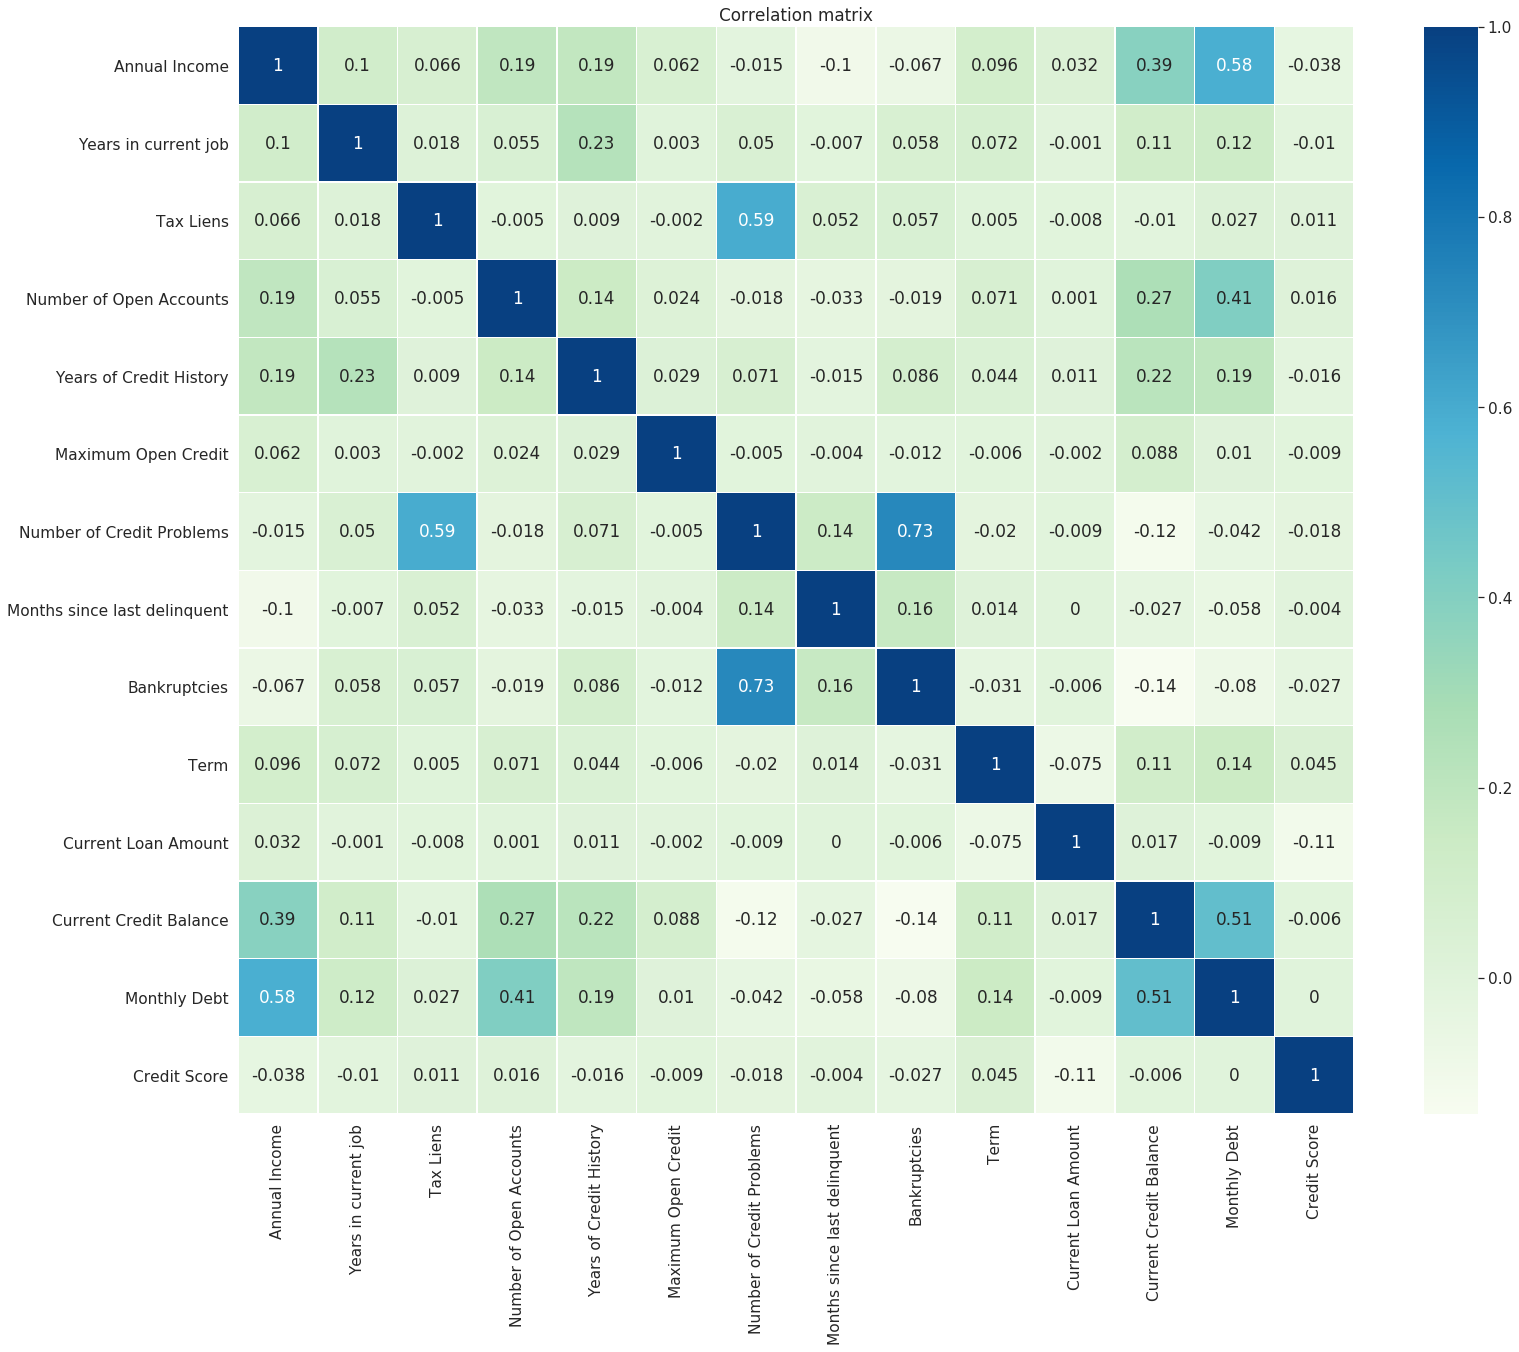

In [318]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

**Преобразуем в dummies**

In [ ]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Home Ownership'])], axis=1)
df_train.columns